In [1]:
D.<x> = PolynomialRing(QQ)
R.<x> = PolynomialRing(QQ)
S = PowerSeriesRing(QQ,'x', default_prec=300)
L=LaurentSeriesRing(QQ,'x', default_prec=300)
#S.<x,y>=PowerSeriesRing(QQ,default_prec=300)
# Using "R = PolynomialRing(QQ,'x')" produces an error.
# Yet using S as defined here is fine (see definition of Fraleigh4 below)
# But S = PowerSeriesRing(QQ,'x','y') also produces an error.
Scplx= PowerSeriesRing(CC,'x',default_prec=300)
def pochhammer(x,n):
    return product ([x+k for k in [0..n-1]])
def cRaleigh2(alpha,beta,nu):
    pchhmrA = pochhammer(alpha,nu)
    pchhmrB = pochhammer(beta,nu)
    fnu=factorial(nu)
    answer = D(pchhmrA*pchhmrB/fnu^2)
    return answer
def term(alpha,beta,p):
    return D(1/(alpha + p) + 1/(beta + p) - 2/(1 + p))
def eRaleigh(alpha, beta, nu):
    return D(sum([term(alpha, beta, p) for p in [0..nu - 1]]))
def FstarRaleigh2(alpha,beta,u,terms):
    fsr = sum([cRaleigh2(alpha, beta, nu)*eRaleigh(alpha,beta,nu)*u^nu for nu in [1..terms]])
    return D(fsr)
def Fraleigh2(alpha,beta,u,terms): 
    return D(sum([cRaleigh2(alpha,beta,nu)*u^nu for nu in [0..terms]]))
def FstarRaleigh3(n,m,x):
    alpha = (1/2-1/m)/2
    beta = (1/2+1/m)/2
    fsr2 = FstarRaleigh2(alpha,beta,x,n)
    return D(fsr2)
def Fraleigh4(n,m,x):
    alpha = (1/2-1/m)/2
    beta = (1/2+1/m)/2
    fr2 = Fraleigh2(alpha,beta,x,n)
    return D(fr2)
def exNo3c(n,m):
    a1 = S(x)*exp(S(FstarRaleigh3(n,m,x)/Fraleigh4(n,m,x))).O(2*n)
    # S(x) instead of x in df of a1 to avoid an error message
    # after use of the stripQuotationMarks command below.
    a2 = S(a1).O(n+1)
    return a2 # applying S to argument of exp is key.
def J(n,m):
    exn = exNo3c(n+2,m)
    jnm = 1/exn.reverse()
    return jnm.O(n+1) # Jtest is faster than J, and they agree.
def normalJ(n,m):
    f = J(n,m)
    return f.truncate(n+1)
def Jcoefficient(n,m):
    f = J(n+2,m)
    f1 = f.truncate(n+1)
    f1=f1.list()
    f1=Set(f1)
    g1 = f.truncate(n)
    g1 = g1.list()
    g1 = set(g1)
    h = f1.difference(g1)
    h = h.list()
    return h[0]
def xjNewStep(n,m): 
    f=J(n,m)
    fl=f.list()
    return (sum(c*x**i*(m**3*2**6)**i for i,c in enumerate(fl)))
def xjNew(n,m):
    return xjNewStep(n-1,m)
def xjNewCoefficient(n,m):
    if n>0:return (xjNew(n,m)-xjNew(n-1,m))/x^n
    if n==0:return 1
def xjNewTest(n,m):
    return D(xjNewStep(n-1,m))
def j(n,m):return xjNew(n,m)/x

def H4(n,m): # this is the definition in the published interpolations paper (2021):
    # def. 8.4
    jay=J(n+1,m)
    djay=x*derivative(jay,x) # bc variable is tau, not x; chain rule.
    numerator = djay^2
    denominator = jay*(jay-1)
    return ((S(numerator/denominator)^(1/(m-2))).O(n+1)).polynomial()
    #if argument is an S type then 'polynomial' takes no argument.

def H4strike(n,m): #this applies the strike operator to the version of H4 that *is*
    #in the Integers paper.
    poly=H4(n,m)
    polylist=poly.list()
    polydegree=poly.degree()
    answer=sum(polylist[k]*(x*m^3*2^6)^k for k in [0..polydegree])
    return answer


def H6(n,m):
    def base6(n,m):
        jay=J(n+1,m)
        num=(x*derivative(jay,x))^m # chain rule; variable is tau not x.
        den = expand(jay^(m-1)*(jay-1))
        return L((-1)^m*(num/den)).O(n+1)
    return S(base6(n,m)^(1/(m-2))).polynomial()
     #if argument is an S type then 'polynomial' takes no argument.

def H6strike(n,m): #this applies the strike operator to the version of H4 that *is*
    #in the Integers paper.
    poly=H6(n,m)
    polylist=poly.list()
    polydegree=poly.degree()
    answer=sum(polylist[k]*(x*m^3*2^6)^k for k in [0..polydegree])
    return answer

def polynomialCoefficient(n,poly):
    return poly.list()[n]
def factorpairToFactor(factorpair):
    (monomial,exponent)=factorpair
    return monomial^exponent
def numericalfactor(polynomial):
    fp=polynomial.factor()
    lst=[factorpairToFactor(factorpair) for factorpair in fp]
    return polynomial/product(lst)
def lastfactor(polynomial):
    fp=polynomial.factor()
    fp=FiniteEnumeratedSet(fp)
    return factorpairToFactor(fp.last())
def reduced(polynomial):
    return numericalfactor(polynomial)*lastfactor(polynomial)
def stripQuotationMarks(string):
    var('x')
    return sage_eval(string,locals={'x':x})
def nieburTau(n):
# The contortions below sidestep mysterious (to me) error messages...
# nieburTau is an algorith for Ramanujan''s tau from the paper
# "A formula for Ramanujan's tau-function" by Douglas Niebur.
# (He spells tau with the Greek letter.)
    def step1(n,k):
        return 35*k^4-52*k^3*n+18*k^2*n^2
    def step2(n,k):
        return sigma(k)*sigma(n-k)
    def step3(n):
        ans=0
        for k in [1..n-1]:
            ans=ans+step1(n,k)*step2(n,k)
        return 24*ans
    return n^4*sigma(n)-step3(n)

def deltaDagger(n,m):
    def ddstep1(n,m):
        return D(S(expand((H4(n+2,m)^3)))).truncate(n+1)
    def ddstep2(n,m):
        return D(S((H6(n+2,m)^2))).truncate(n+1)
    return ((ddstep1(n,m)-ddstep2(n,m))/1728)

def deltaDaggerStrike(n,m): #this applies the strike operator to the version of H4 that *is*
    #in the Integers paper.
    poly=deltaDagger(n,m)
    polylist=poly.list()
    polydegree=poly.degree()
    answer=sum(polylist[k]*(x*m^3*2^6)^k for k in [1..polydegree])
    return answer

# def deltaDaggerStrike(n,m):
 #   return S(((H4strike(n,3)^3-H6strike(n,3)^2)/1728)).truncate(n+1)

def first(list):return list[0]
def last(list):return list[-1]

def rmnjntau(n):
    answer=0
    for k in [1..n-1]:
        answer=answer+(6*k-4*(n-k))*sigma(k,3)*sigma(n-k,5)
    answer=(5*sigma(n,3)+7*sigma(n,5))*n/12-35*answer
    return answer

def element(k,listo):
    if k>len(listo):return (print("bad k"))
    return listo[k-1]

def mobiusInverseOfFunction(g,n):
    dv=divisors(n)
    nd=len(dv)
    f=0
    for k in [1..nd]:
        dvk=element(k,dv)
        f=f+moebius(dvk)*g(n/dvk)
    return f

def mobiusInverseOfList(g,n):
    dv=divisors(n)
    nd=len(dv)
    f=0
    for k in [1..nd]:
        dvk=element(k,dv)
        gndvk=element(n/dvk,g)
        f=f+moebius(dvk)*gndvk
    return f

def drop_first_element(listo):
    lenth=len(listo)
    answer=[]
    for k in [1..lenth-1]:
        answer=answer+[listo[k]]
    return answer

def factorSeriesFromLists(lsst,bound):
    truncatedlist=drop_first_element(lsst)
    F=[element(1,truncatedlist)]
    nswr=[-mobiusInverseOfList(F,1)/1]
    for n in [2..bound]:
        summ=0
        for k in [1..n-1]:
            ekf=element(k,F)
            tnk=element(n-k,truncatedlist)
            summ=summ+ekf*tnk
        Fn=n*element(n,truncatedlist)-summ
        F=F+[Fn]
        xpn=-mobiusInverseOfList(F,n)/n
        nswr=nswr+[xpn]
    return nswr

def factorSeriesFromListsWithTracking(lsst,bound):
    truncatedlist=drop_first_element(lsst)
    F=[element(1,truncatedlist)]
    nswr=[-mobiusInverseOfList(F,1)/1]
    for n in [2..bound]:
        summ=0
        for k in [1..n-1]:
            ekf=element(k,F)
            tnk=element(n-k,truncatedlist)
            summ=summ+ekf*tnk
            print((n,k))
        Fn=n*element(n,truncatedlist)-summ
        F=F+[Fn]
        xpn=-mobiusInverseOfList(F,n)/n
        nswr=nswr+[xpn]
        print("answer length: ",len(nswr))
    return nswr



print("ok")

ok


In [ ]:
#from 'H4 from scratch per 2021 Integers paper'
data=[]
import time
for m in [3..403]:
    start=time.time()
    poly=H4(100,m)
    data=data+[[m,poly]]
    finish=time.time()
    print([m,poly.degree(),finish-start])
import pickle
wfile = open('/Users/barrybrent/21mar12no15.txt','w') # H4 series (date typo)
s = pickle.dumps(str(data))
wfile.write(s)
wfile.close()

In [ ]:
#from 'H4 from scratch per 2021 Integers paper'
import pickle
rfile = open('/Users/barrybrent/21mar12no15.txt','r') # H4 series
rs=pickle.load(rfile)
rfile.close()
s=stripQuotationMarks(rs)
polydata=[]
import pickle
import time
wfile = open('/Users/barrybrent/21mar21no19.txt','w') #H4 polynomials
for n in [0..100]:
    start=time.time()
    data=[]
    for k in [0..400]:
        m = s[k][0]
        poly=s[k][1]
        cf=polynomialCoefficient(n,poly)
        data=data+[[m,cf]]
        rl=R.lagrange_polynomial(data)
    polydata=polydata+[[n,rl]]
    finish=time.time()
    print([n,rl.degree(),finish-start])
t = pickle.dumps(str(polydata))
wfile.write(t)
wfile.close()

In [2]:
n=5
dds=deltaDagger(n,3)
cffs=dds.list()
data=[]
for k in [1..n]:
    data=data+[cffs[k]-rmnjntau(k)]
print(data)

[-1727/1728, 2985983/124416, -36118462457/143327232, 205070310309865/139314069504, -12402652367542025435/2567836929097728]


In [ ]:
# from notebook H6 from scratch 6sept22
data=[]
for m in [3..400]:
    if 10 in divisors(m):
        print m
    data=data+[[m,H6(100,m)]]
import pickle
wfile = open('/Users/barrybrent/8mar21no13.txt','a')
s = pickle.dumps(str(data))
wfile.write(s)
wfile.close()

In [5]:
import pickle
rfile = open('/Users/barrybrent/21mar12no15.txt','rb') # H4 series
rs=pickle.load(rfile)
rfile.close()
s=stripQuotationMarks(rs)

import pickle
rfile2 = open('/Users/barrybrent/8mar21no13.txt','rb') #H6 series
rt=pickle.load(rfile2)
rfile2.close()
t=stripQuotationMarks(rt)

import pickle
import time
wfile = open('/Users/barrybrent/9sept22no5.txt','wb') # deltaDagger series
data=[]
minn=min(len(s),len(t))
print("minn: ",minn)
start = time.time()
for n in [0..minn-1]:
    start = time.time()
    m=s[n][0]
    h6squared=t[n][1]^2
    h4cubed=s[n][1]^3
    dagger=D(((h4cubed-h6squared)/1728)).truncate(10)
    data=data+[[m,dagger]]
    finish = time.time()
    print([m,finish-start])
t = pickle.dumps(str(data))
wfile.write(t)
wfile.close()

minn:  118
[3, 0.6201319694519043]
[4, 0.013334989547729492]
[5, 0.022006988525390625]
[6, 0.00979304313659668]
[7, 0.022192001342773438]
[8, 0.022542953491210938]
[9, 0.02272796630859375]
[10, 0.022314786911010742]
[11, 0.023181915283203125]
[12, 0.023623228073120117]
[13, 0.023633956909179688]
[14, 0.023179054260253906]
[15, 0.022306203842163086]
[16, 0.023122072219848633]
[17, 0.024840116500854492]
[18, 0.022766828536987305]
[19, 0.022942066192626953]
[20, 0.022697925567626953]
[21, 0.024463176727294922]
[22, 0.023355960845947266]
[23, 0.024982929229736328]
[24, 0.023640871047973633]
[25, 0.02415299415588379]
[26, 0.023981809616088867]
[27, 0.025621891021728516]
[28, 0.024341821670532227]
[29, 0.024050235748291016]
[30, 0.025086164474487305]
[31, 0.024219274520874023]
[32, 0.0250091552734375]
[33, 0.025048017501831055]
[34, 0.024292945861816406]
[35, 0.025332927703857422]
[36, 0.025018930435180664]
[37, 0.026704072952270508]
[38, 0.024983882904052734]
[39, 0.024480104446411133]
[40,

In [12]:
import pickle

rfile = open('/Users/barrybrent/21mar12no15.txt','rb') # H4 series
rs=pickle.load(rfile)
rfile.close()
s=stripQuotationMarks(rs)

rfile2 = open('/Users/barrybrent/8mar21no13.txt','rb') #H6 series
rt=pickle.load(rfile2)
rfile2.close()
t=stripQuotationMarks(rt)


import time
wfile = open('/Users/barrybrent/9sept22no6.txt','wb') # deltaDagger series
data=[]
minn=min(len(s),len(t))
print("minn: ",minn-1)
start = time.time()
for n in [0..minn-1]:
    start = time.time()
    m=s[n][0]
    h6squared=t[n][1]^2
    h4cubed=s[n][1]^3
    dagger=D(((h4cubed-h6squared)/1728)).truncate(100)
    data=data+[[m,dagger]]
    finish = time.time()
    print([m,dagger.degree(),finish-start])
t = pickle.dumps(str(data))
wfile.write(t)
wfile.close()

minn:  117
[3, 99, 0.011957168579101562]
[4, 99, 0.013735771179199219]
[5, 99, 0.021851062774658203]
[6, 99, 0.00971078872680664]
[7, 99, 0.02241992950439453]
[8, 99, 0.023030996322631836]
[9, 99, 0.023097753524780273]
[10, 99, 0.022397279739379883]
[11, 99, 0.022961139678955078]
[12, 99, 0.023943185806274414]
[13, 99, 0.02356100082397461]
[14, 99, 0.02279496192932129]
[15, 99, 0.02321791648864746]
[16, 99, 0.024821996688842773]
[17, 99, 0.024475812911987305]
[18, 99, 0.0241849422454834]
[19, 99, 0.024228811264038086]
[20, 99, 0.022803068161010742]
[21, 99, 0.023247241973876953]
[22, 99, 0.02528214454650879]
[23, 99, 0.02517223358154297]
[24, 99, 0.023459911346435547]
[25, 99, 0.023612022399902344]
[26, 99, 0.026208162307739258]
[27, 99, 0.024656057357788086]
[28, 99, 0.024194002151489258]
[29, 99, 0.024216890335083008]
[30, 99, 0.024626970291137695]
[31, 99, 0.023700952529907227]
[32, 99, 0.024402856826782227]
[33, 99, 0.023902177810668945]
[34, 99, 0.024098873138427734]
[35, 99, 0.02

In [13]:
R.<x> = PowerSeriesRing(ZZ)
import pickle
rfile = open('/Users/barrybrent/9sept22no6.txt','rb') # deltaDagger series
rs=pickle.load(rfile) 
rfile.close()
s=stripQuotationMarks(rs)
bound=100
def m(n):return s[n][0]
def pre_g(n):return s[n][1]
def g(n):return list(D(pre_g(n)))
dfeg=drop_first_element(g(0))
print(len(dfeg))
print(dfeg)

99
[1, -24, 252, -1472, 4830, -6048, -16744, 84480, -113643, -115920, 534612, -370944, -577738, 401856, 1217160, 987136, -6905934, 2727432, 10661420, -7109760, -4219488, -12830688, 18643272, 21288960, -25499225, 13865712, -73279080, 24647168, 128406630, -29211840, -52843168, -196706304, 134722224, 165742416, -80873520, 167282496, -182213314, -255874080, -145589976, 408038400, 308120442, 101267712, -17125708, -786948864, -548895690, -447438528, 2687348496, 248758272, -1696965207, 611981400, -1740295368, 850430336, -1596055698, 1758697920, 2582175960, -1414533120, 2686677840, -3081759120, -5189203740, -1791659520, 6956478662, 1268236032, 1902838392, 2699296768, -2790474540, -3233333376, -15481826884, 10165534848, 4698104544, 1940964480, 9791485272, -9600560640, 1463791322, 4373119536, -6425804700, -15693610240, -8951543328, 3494159424, 38116845680, 4767866880, 1665188361, -7394890608, -29335099668, 6211086336, -33355661220, 411016992, 32358470760, 45164021760, -24992917110, 13173496560, 

In [16]:
R.<x> = PowerSeriesRing(ZZ)
import pickle
rfile = open('/Users/barrybrent/9sept22no6.txt','rb') # deltaDagger series
rs=pickle.load(rfile) 
rfile.close()
s=stripQuotationMarks(rs)
bound=99
def m(n):return s[n][0]
def pre_g(n):return s[n][1]
def g(n):return list(D(pre_g(n)))
dfeg=drop_first_element(g(0))
fs=factorSeriesFromLists(dfeg,bound-1)
print([m(0),fs])
print(len(fs))

[3, [24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24]]
98


In [17]:
import pickle
rfile = open('/Users/barrybrent/9sept22no6.txt','rb') # deltaDagger series
rs=pickle.load(rfile) 
rfile.close()
s=stripQuotationMarks(rs)
print(len(s))

118


In [20]:
R.<x> = PowerSeriesRing(ZZ)
import pickle
rfile = open('/Users/barrybrent/9sept22no6.txt','rb') # deltaDagger series
rs=pickle.load(rfile) 
rfile.close()
s=stripQuotationMarks(rs)
data=[]
bound=99
def m(n):return s[n][0]
def pre_g(n):return s[n][1]
def g(n):return list(D(pre_g(n)))
import time
start=time.time()
for index in [0..117]:
    
    dfeg=drop_first_element(g(index))
    fs=factorSeriesFromLists(dfeg,bound-1)
    data=data+[[m(index),fs]]
    print([m(index),time.time()-start])

wfile = open('/Users/barrybrent/9sept22no7.txt','wb') #dagger Euler exponents
t = pickle.dumps(str(data))
wfile.write(t)
wfile.close()

[3, 0.019832134246826172]
[4, 0.04767012596130371]
[5, 0.0921778678894043]
[6, 0.1150960922241211]
[7, 0.15406107902526855]
[8, 0.19161701202392578]
[9, 0.22060108184814453]
[10, 0.2570199966430664]
[11, 0.2998049259185791]
[12, 0.32749009132385254]
[13, 0.369887113571167]
[14, 0.40862393379211426]
[15, 0.4386298656463623]
[16, 0.47859787940979004]
[17, 0.5236461162567139]
[18, 0.5539090633392334]
[19, 0.5939841270446777]
[20, 0.6336519718170166]
[21, 0.6624250411987305]
[22, 0.7021751403808594]
[23, 0.7454609870910645]
[24, 0.7774391174316406]
[25, 0.823951005935669]
[26, 0.8664572238922119]
[27, 0.8966600894927979]
[28, 0.9382190704345703]
[29, 0.9812390804290771]
[30, 1.009092092514038]
[31, 1.0522549152374268]
[32, 1.099764108657837]
[33, 1.134692907333374]
[34, 1.178361177444458]
[35, 1.220717191696167]
[36, 1.2524290084838867]
[37, 1.297335147857666]
[38, 1.3429059982299805]
[39, 1.3738288879394531]
[40, 1.4154949188232422]
[41, 1.4609501361846924]
[42, 1.4936299324035645]
[43, 1

In [21]:
import pickle
rfile = open('/Users/barrybrent/9sept22no7.txt','rb') #dagger Euler exponents
rs=pickle.load(rfile) 
rfile.close()
s=stripQuotationMarks(rs)
print(len(s))
print(s[0])

118
[3, [24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24]]


In [7]:
# interpolating polynomials
import pickle
rfile = open('/Users/barrybrent/9sept22no7.txt','rb') #dagger Euler exponents
rs=pickle.load(rfile)
rfile.close()
s=stripQuotationMarks(rs)
polydata=[]
import time
wfile = open('/Users/barrybrent/9sept22no8.txt','wb') #dagger Euler exponents polynomials
start = time.time()
for qpower in [0..19]:  #any more and the degrees become constant
    data=[]
    for k in [0..len(s)-1]:
        m = s[k][0]
        poly=D(s[k][1])
        cf=polynomialCoefficient(qpower,poly)
        data=data+[[m,cf]]
    rl=R.lagrange_polynomial(data)
    polydata=polydata+[[qpower,rl]] 
    rl=D(rl)
    finish = time.time()
    print([qpower,rl.degree(),finish-start])
t = pickle.dumps(str(polydata))
wfile.write(t)
wfile.close()

[0, 6, 0.058804988861083984]
[1, 12, 0.11952590942382812]
[2, 18, 0.18046808242797852]
[3, 24, 0.28282976150512695]
[4, 30, 0.3466470241546631]
[5, 36, 0.40964293479919434]
[6, 42, 0.4710867404937744]
[7, 48, 0.5333678722381592]
[8, 54, 0.5955469608306885]
[9, 60, 0.6582858562469482]
[10, 66, 0.7213938236236572]
[11, 72, 0.785463809967041]
[12, 78, 0.8501119613647461]
[13, 84, 0.9144997596740723]
[14, 90, 0.9795200824737549]
[15, 96, 1.0490899085998535]
[16, 102, 1.158686876296997]
[17, 108, 1.2268118858337402]
[18, 114, 1.2957818508148193]
[19, 117, 1.367224931716919]


exponent:  0


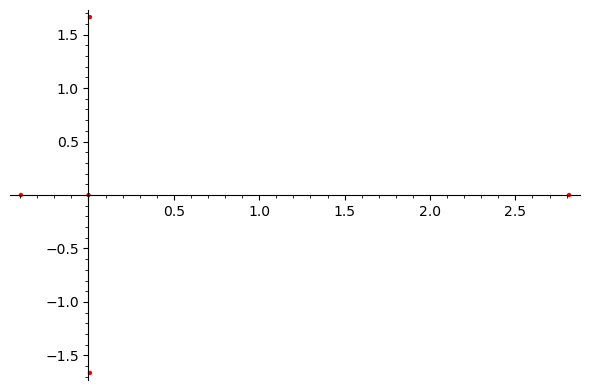

exponent:  1


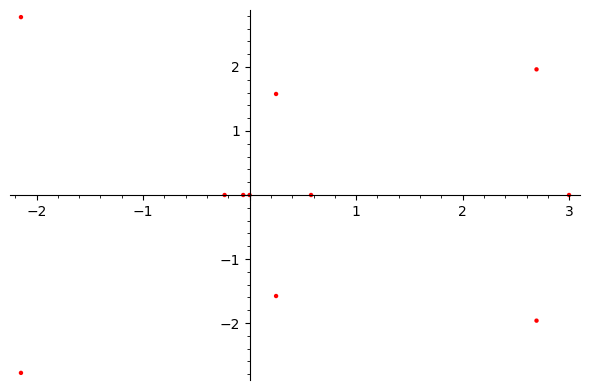

exponent:  2


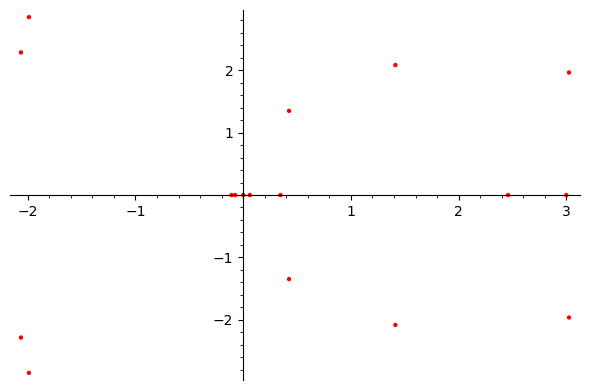

exponent:  3


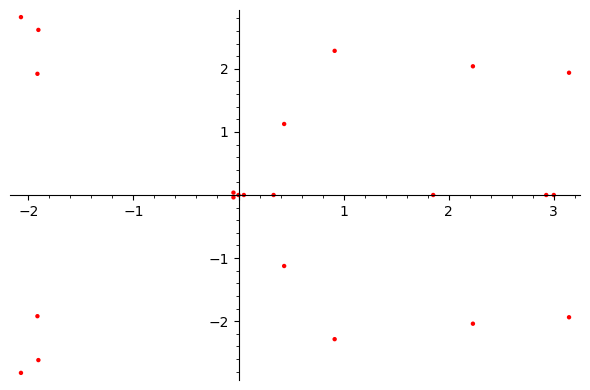

exponent:  4


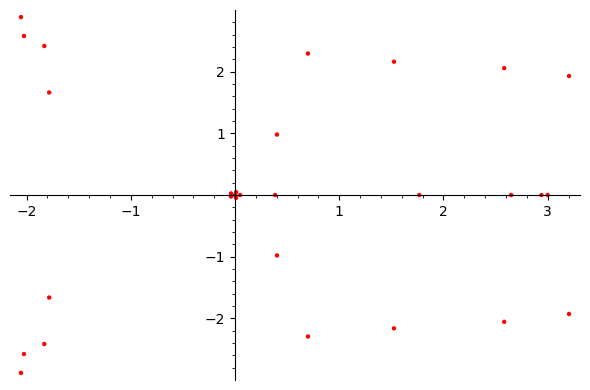

exponent:  5


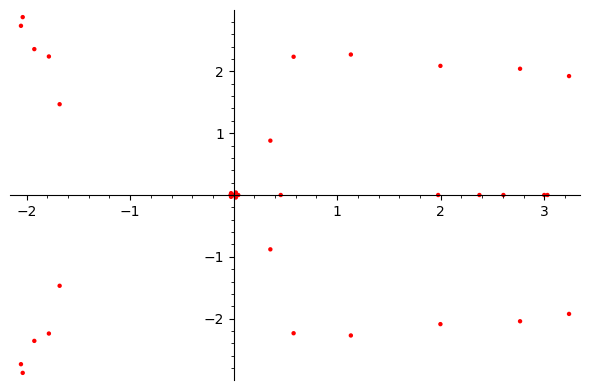

exponent:  6


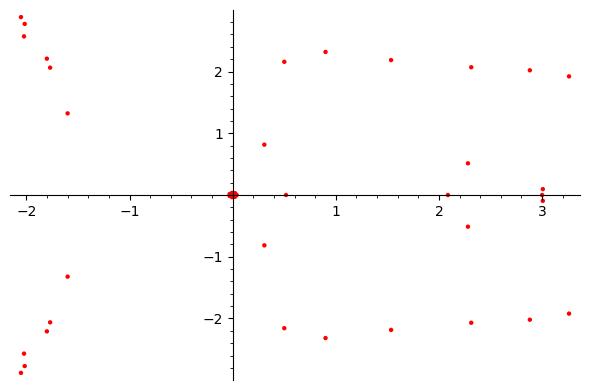

exponent:  7


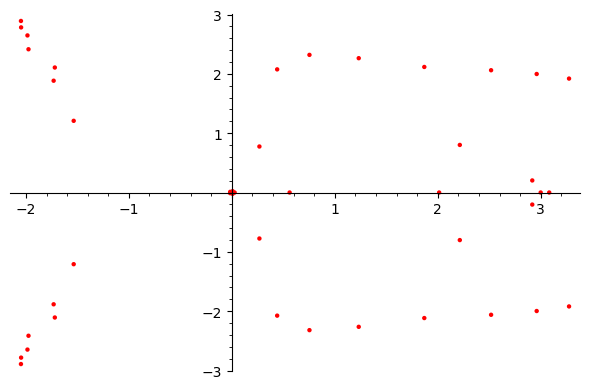

exponent:  8


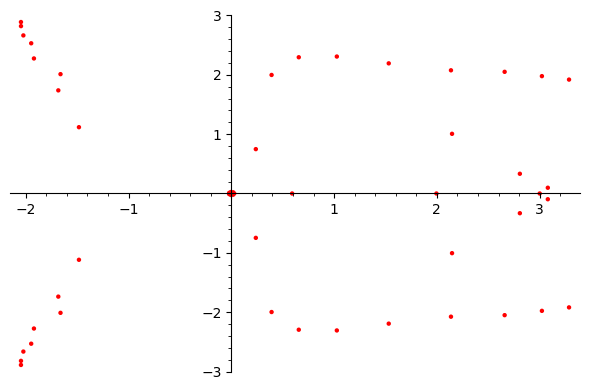

exponent:  9


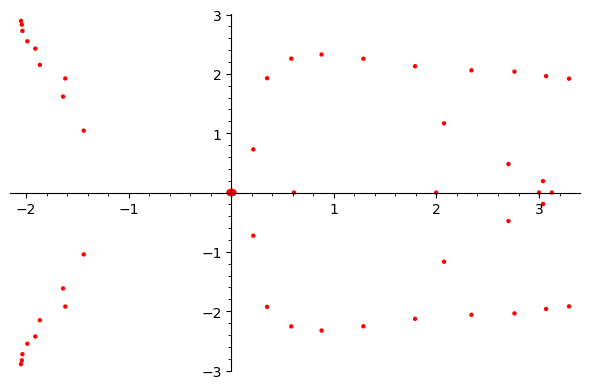

exponent:  10


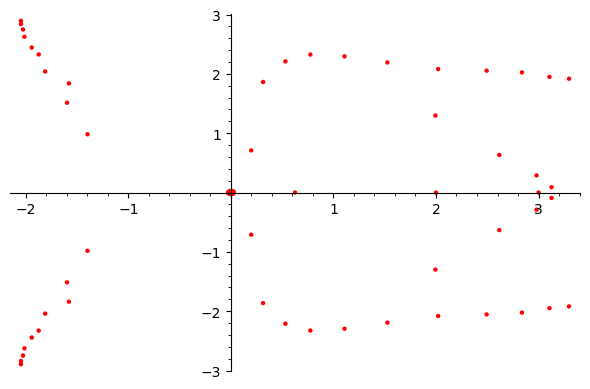

exponent:  11


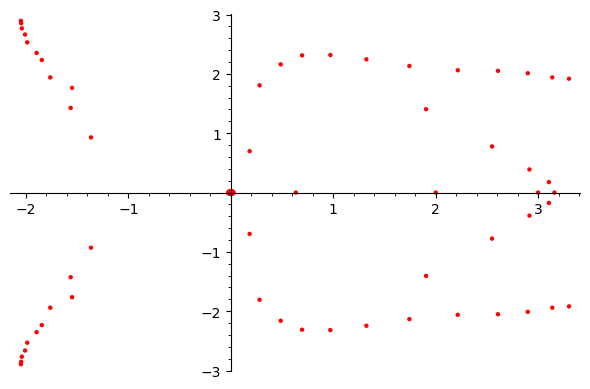

exponent:  12


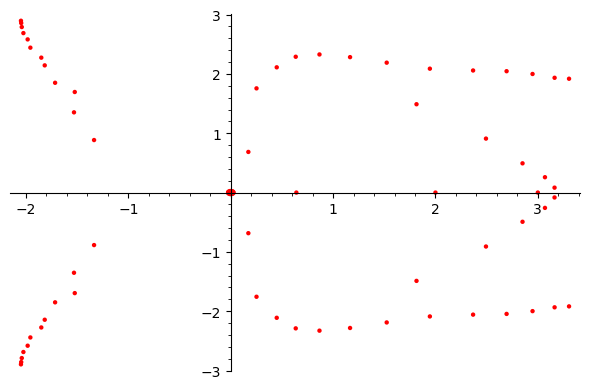

exponent:  13


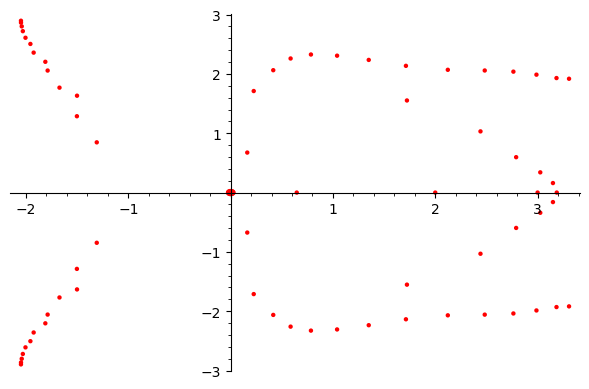

exponent:  14


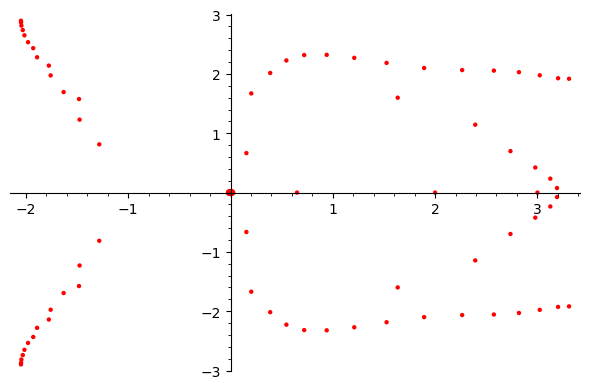

exponent:  15


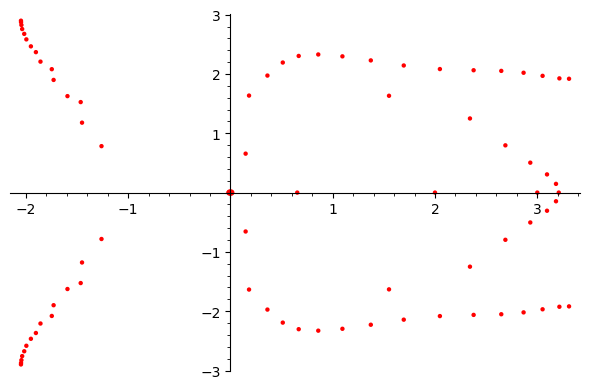

exponent:  16


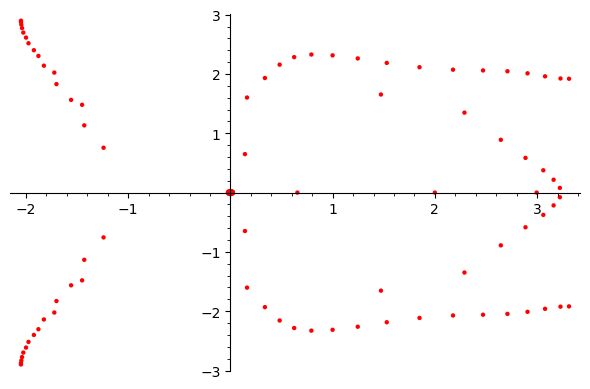

exponent:  17


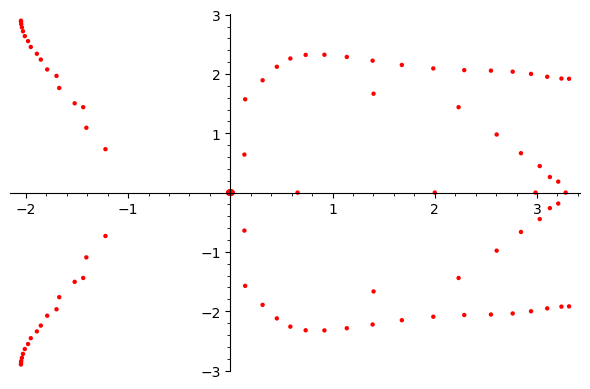

exponent:  18


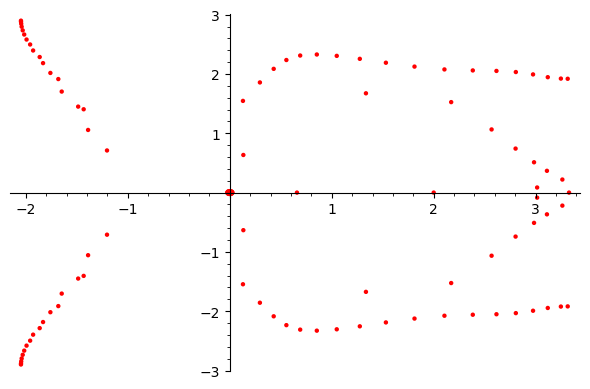

exponent:  19


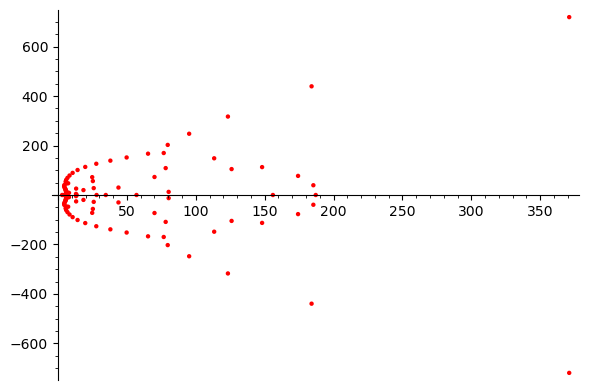

In [11]:
import pickle
rfile = open('/Users/barrybrent/9sept22no8.txt','rb') #dagger Euler exponents polynomials
rs=pickle.load(rfile)
rfile.close()
s=stripQuotationMarks(rs)
lnth=len(s)
for k in [0..lnth-1]:
    print("=====================================================================================")
    print("exponent: ",s[k][0])
    points=[]
    poly=s[k][1]
    poly=R(poly)
    pr=poly.roots(CC)
    lpr=len(pr)
    roots=[]
    for j in [0..lpr-1]:
        root=pr[j][0]
        imroot=imaginary(root)
        rlroot=real(root)
        rootpair=(rlroot,imroot)
        roots=roots+[rootpair]
       
    rootplot=list_plot(roots,color='red',size=10)
    show(rootplot)